### Installing PRAW library 

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


### This sets up a Reddit instance with the provided client_id, client_secret & user agent, to make API calls to Reddit 

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="xDLI-1Ck6sr48l8od6FPLA",
    client_secret="yKsO-srxo6Ej2Ra6HrmUmWPssdDgXw",
    user_agent=user_agent
)

#### Importing pandas and numpy libraries

In [3]:
import pandas as pd
import numpy as np
import re

#### Prints various attributes of each submission, such as title, ID, author, creation time, score, upvote ratio, and URL

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Stocks").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Rate My Portfolio - r/Stocks Quarterly Thread March 2024
1b3qoq5
AutoModerator
1709287222.0
62
0.93
https://www.reddit.com/r/stocks/comments/1b3qoq5/rate_my_portfolio_rstocks_quarterly_thread_march/
0


#### Prints the length of the headlines set gives the count of unique submission titles

In [5]:
headlines = set()
for submission in reddit.subreddit("Stocks").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

277


#### Creates a dataframe from the scrapped data

In [6]:
stocks_df = pd.DataFrame(headlines)
stocks_df.head()

,0
0,"29 years old, feels like I’ve lost too much ti..."
1,Stocks are doing just fine on their own' and d...
2,Elon Musk to present $20-30 billion investment...
3,Dow Jones Futures Tumble On Iran Explosions; S...
4,"Question: Do traders, insttitutions and hedge ..."


#### Renaming the column name to text

In [7]:
stocks_df.columns = ['text']
stocks_df

,text
0,"29 years old, feels like I’ve lost too much ti..."
1,Stocks are doing just fine on their own' and d...
2,Elon Musk to present $20-30 billion investment...
3,Dow Jones Futures Tumble On Iran Explosions; S...
4,"Question: Do traders, insttitutions and hedge ..."
...,...
272,"Fuel use for the month, PCE indicator."
273,"BlackRock Bitcoin ETF Sees Zero Daily Inflows,..."
274,Low-risk ETF that'll have similar returns to i...
275,FTC sues to block Coach parent Tapestry's acqu...


#### Displays the column names and dtype

In [8]:
stocks_df.columns

Index(['text'], dtype='object')

In [9]:
stocks_df.columns=['Titles']#renaming the column to 'Titles'

In [10]:
stocks_df.head() #prints the first 5 records of the dataset

,Titles
0,"29 years old, feels like I’ve lost too much ti..."
1,Stocks are doing just fine on their own' and d...
2,Elon Musk to present $20-30 billion investment...
3,Dow Jones Futures Tumble On Iran Explosions; S...
4,"Question: Do traders, insttitutions and hedge ..."


#### Counts the duplicates in the 'Titles' column of the dataframe 'stocks_df'

In [11]:
stocks_df.Titles.duplicated().sum() 

0

#### Cleaning the text by removing- text starting with '@', hashtags '#', retweet indicators 'RT', hyperlinks, and colons from the text

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
stocks_df["Titles"]= stocks_df["Titles"].apply(cleanTxt)

#Show the clean text
stocks_df.head()

,Titles
0,"29 years old, feels like I’ve lost too much ti..."
1,Stocks are doing just fine on their own' and d...
2,Elon Musk to present $20-30 billion investment...
3,Dow Jones Futures Tumble On Iran Explosions; S...
4,"Question Do traders, insttitutions and hedge f..."


####  Removes emojis from a string using regular expressions

In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
stocks_df["Titles"]= stocks_df["Titles"].apply(remove_emoji)

#Show the clean text
stocks_df.head()

,Titles
0,"29 years old, feels like I’ve lost too much ti..."
1,Stocks are doing just fine on their own' and d...
2,Elon Musk to present $20-30 billion investment...
3,Dow Jones Futures Tumble On Iran Explosions; S...
4,"Question Do traders, insttitutions and hedge f..."


#### Installing textblob package

In [14]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob #importing textblob
from wordcloud import WordCloud, STOPWORDS #importing WordCloud & stopwords

#### These functions calculates the subjectivity & polarity of the input text

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
stocks_df['Subjectivity'] = stocks_df['Titles'].apply(getSubjectivity)
stocks_df['Polarity'] = stocks_df['Titles'].apply(getPolarity)

#Now display data
stocks_df.head()

,Titles,Subjectivity,Polarity
0,"29 years old, feels like I’ve lost too much ti...",0.20,0.150000
1,Stocks are doing just fine on their own' and d...,0.75,0.508333
2,Elon Musk to present $20-30 billion investment...,0.00,0.000000
3,Dow Jones Futures Tumble On Iran Explosions; S...,0.00,0.000000
4,"Question Do traders, insttitutions and hedge f...",0.00,0.000000


#### Grouping polarity scores into categories: "Negative", "Neutral", and "Positive"

In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
stocks_df["Insight"] = stocks_df["Polarity"].apply(getInsight)

stocks_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"29 years old, feels like I’ve lost too much ti...",0.200000,0.150000,Positive
1,Stocks are doing just fine on their own' and d...,0.750000,0.508333,Positive
2,Elon Musk to present $20-30 billion investment...,0.000000,0.000000,Neutral
3,Dow Jones Futures Tumble On Iran Explosions; S...,0.000000,0.000000,Neutral
4,"Question Do traders, insttitutions and hedge f...",0.000000,0.000000,Neutral
5,INTC vs TSLA - Trying to understand market sen...,0.000000,0.000000,Neutral
6,Assessing Market Reaction to Retail Sales and ...,0.000000,0.000000,Neutral
7,New York Stock Exchange tests views on round-t...,0.454545,0.136364,Positive
8,These are the stocks on my watchlist (4/12),0.000000,0.000000,Neutral
9,why michael burry shorted the s&p 500 in 2023?,0.000000,0.000000,Neutral


#### Importing libraries sets up the environment for creating visualizations

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

####  Bar plot to visualize the sentiment scores of the stocks

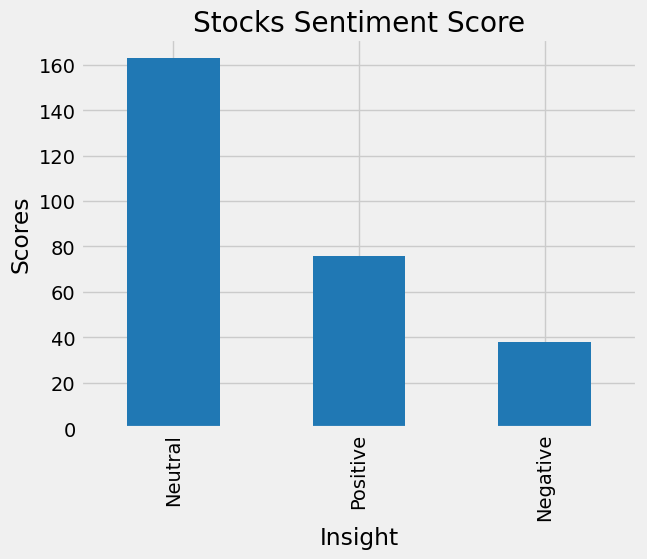

In [19]:
#Plot the values count of sentiment
plt.title("Stocks Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
stocks_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

#### Gives a word cloud visualization where the size of each word corresponds to its frequency in the titles data

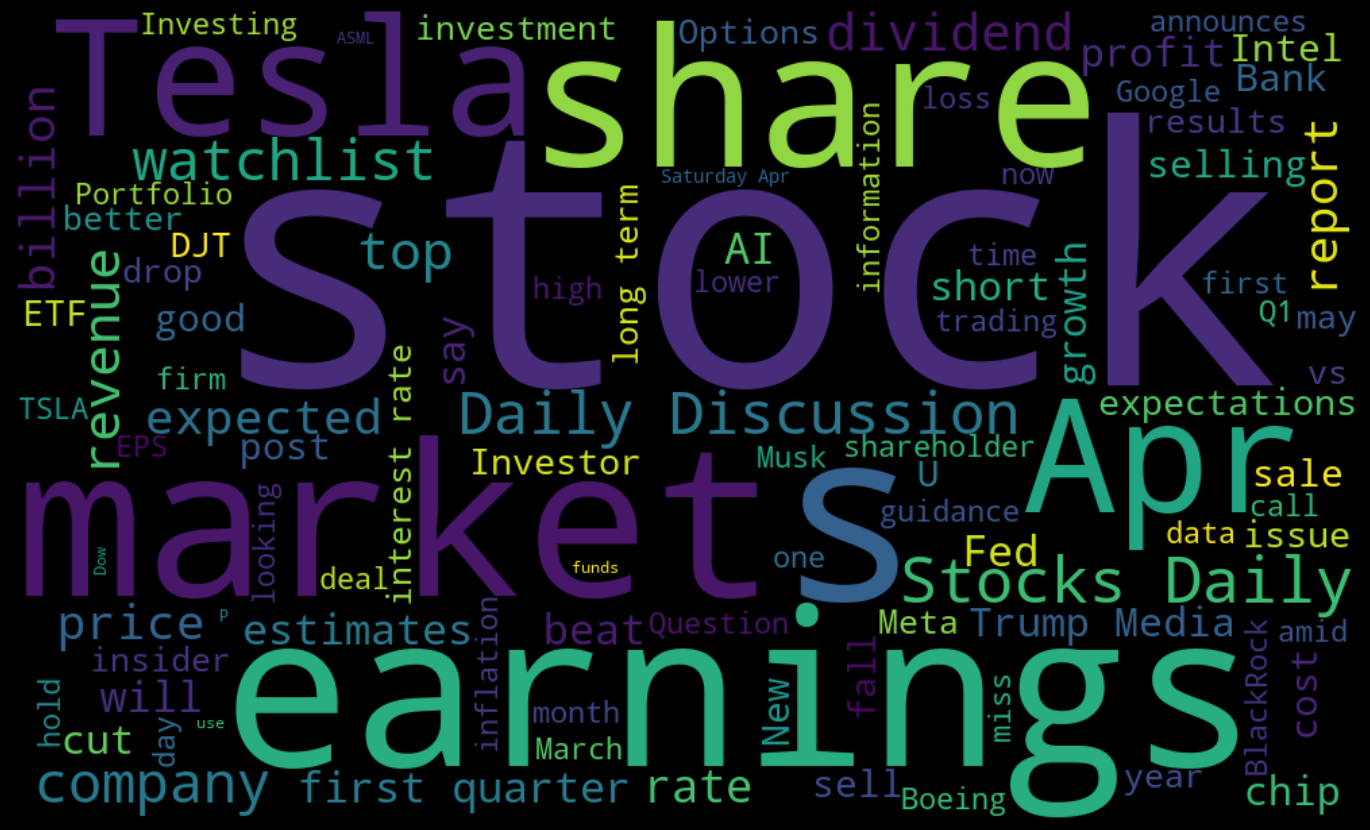

In [20]:
text = ' '.join( [twts for twts in stocks_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");